<a href="https://colab.research.google.com/github/NakulDeotale/Internship-Task/blob/main/Internship_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Importing the dataset
df_purchase = pd.read_csv('/content/purchase_behaviour.csv')
df_transaction = pd.read_csv('/content/transaction_data.csv')

In [3]:
# First five rows of the dataset
df_purchase.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
# First five rows of the dataset
df_transaction.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
df_purchase.info()
print('-------------------------------------------','\n')
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
------------------------------------------- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  floa

##Data Preprocessing

In [6]:
#Check for any missing values
print(df_purchase.isnull().sum())
print('\n')
print(df_transaction.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


In [7]:
# Check for duplicate rows
df_purchase.duplicated().sum(), df_transaction.duplicated().sum()

(0, 1)

In [8]:
df_transaction.drop_duplicates(inplace=True)


In [9]:
# Merging both dataframes based on common
df_merged = df_transaction.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

In [10]:
df_merged

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...
264830,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264831,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264832,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264833,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


In [11]:
#Dropping the columns that are not relevant for the analysis.
df_merged.drop(columns=['STORE_NBR','DATE','PROD_NBR'], inplace=True)

In [12]:
df_merged

,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,1,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1307,348,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,1343,383,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2373,974,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2426,1038,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...
264830,272319,270088,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,YOUNG SINGLES/COUPLES,Premium
264831,272358,270154,Tostitos Splash Of Lime 175g,1,4.4,YOUNG SINGLES/COUPLES,Premium
264832,272379,270187,Doritos Mexicana 170g,2,8.8,YOUNG SINGLES/COUPLES,Premium
264833,272379,270188,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,YOUNG SINGLES/COUPLES,Premium


####Best selling products

In [13]:
top_products = df_merged.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
top_products = top_products.sort_values(by="TOT_SALES", ascending=False)
top3_products = top_products.head(3)

In [14]:
top3_products

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,40352.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
77,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


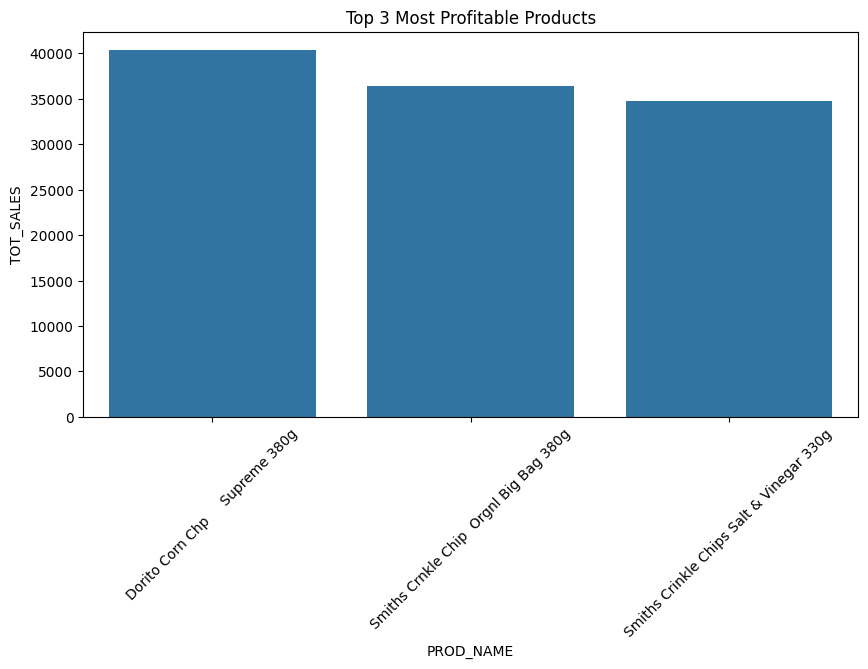

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x="PROD_NAME", y="TOT_SALES", data=top3_products)
plt.title("Top 3 Most Profitable Products")
plt.xticks(rotation=45)
plt.show()

####Identifying Loyal Customers


In [16]:
# Calculate total transactions and total sales by each customer
loyal_customers = df_merged.groupby("LYLTY_CARD_NBR").agg(
    total_transactions=("TXN_ID", "count"),
    total_spent=("TOT_SALES", "sum")).reset_index()

loyal_customers = loyal_customers.sort_values(by="total_transactions", ascending=False)

In [17]:
top_loyal_customers = loyal_customers.head(10)
top_loyal_customers

,LYLTY_CARD_NBR,total_transactions,total_spent
42813,162039,18,126.8
45905,172032,18,120.1
3686,13138,17,109.0
31654,116181,17,117.6
34943,128178,17,99.7
60925,230078,17,138.6
28605,105026,16,114.2
35061,129050,16,93.5
29617,109036,16,113.0
59107,222242,16,109.2


####Identifying the segment to which these loyal customers belong to

In [18]:
# Merge loyal customers with purchase data to identify profitable customer segments
loyal_customers_details = top_loyal_customers.merge(df_purchase, on="LYLTY_CARD_NBR", how="left")

In [19]:
loyal_customers_details.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"]).agg(count=("LIFESTAGE", "size")).reset_index()


,LIFESTAGE,PREMIUM_CUSTOMER,count
0,OLDER FAMILIES,Budget,1
1,OLDER FAMILIES,Mainstream,3
2,OLDER SINGLES/COUPLES,Premium,1
3,YOUNG FAMILIES,Budget,1
4,YOUNG FAMILIES,Mainstream,1
5,YOUNG FAMILIES,Premium,2
6,YOUNG SINGLES/COUPLES,Mainstream,1


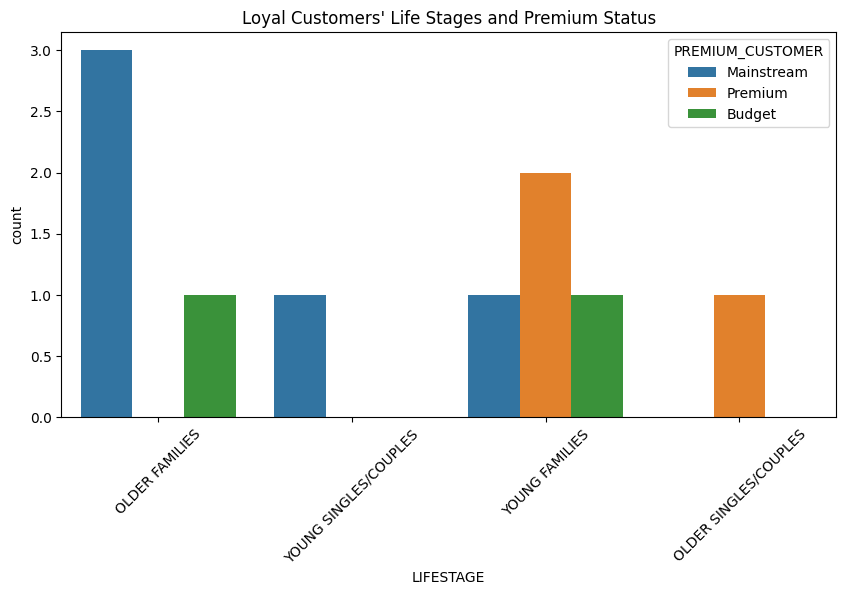

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loyal_customers_details, x="LIFESTAGE", hue="PREMIUM_CUSTOMER")
plt.title("Loyal Customers' Life Stages and Premium Status")
plt.xticks(rotation=45)
plt.show()

In [21]:
# Filter transactions of loyal customers
loyal_txns = df_merged[df_merged["LYLTY_CARD_NBR"].isin(top_loyal_customers["LYLTY_CARD_NBR"])]
loyal_txns

,LYLTY_CARD_NBR,TXN_ID,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
32775,230078,232430,Pringles Chicken Salt Crips 134g,4,14.8,OLDER FAMILIES,Budget
52409,230078,232416,Smiths Crinkle Original 330g,2,11.4,OLDER FAMILIES,Budget
52410,230078,232417,RRD Honey Soy Chicken 165g,2,6.0,OLDER FAMILIES,Budget
52411,230078,232418,Tostitos Smoked Chipotle 175g,2,8.8,OLDER FAMILIES,Budget
52412,230078,232419,Smiths Crinkle Cut Chips Barbecue 170g,2,5.8,OLDER FAMILIES,Budget
...,...,...,...,...,...,...,...
251332,172032,172946,Tostitos Splash Of Lime 175g,2,8.8,YOUNG SINGLES/COUPLES,Mainstream
251333,172032,172947,Infuzions SourCream&Herbs Veg Strws 110g,2,7.6,YOUNG SINGLES/COUPLES,Mainstream
251334,172032,172948,Natural ChipCo Hony Soy Chckn175g,2,6.0,YOUNG SINGLES/COUPLES,Mainstream
251335,172032,172949,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,YOUNG SINGLES/COUPLES,Mainstream


In [24]:
loyal_txns['LIFESTAGE'].unique()

array(['OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'], dtype=object)

In [27]:
# Check preferred products among loyal customers
loyal_product_preference = loyal_txns.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()
loyal_product_preference = loyal_product_preference.sort_values(by="TOT_SALES", ascending=False)
loyal_product_preference.head(5)

,PROD_NAME,TOT_SALES
74,Twisties Cheese Burger 250g,51.6
59,Smiths Crinkle Cut Chips Chs&Onion170g,34.8
57,Smiths Crinkle Chips Salt & Vinegar 330g,34.2
27,Kettle Sensations BBQ&Maple 150g,27.6
38,Pringles Chicken Salt Crips 134g,25.9
